<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/Numerical%20Methods/B%C3%BAsqueda_de_ra%C3%ADces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de búsqueda de raíces 


### La tarea

¿Cómo podemos encontrar la raíz $ x_0 $ de una función $ f (x) $, es decir
$$ f (x_0) = 0, $$ si no podemos determinarlo con lápiz y papel.

Tenga en cuenta que podría haber más de una raíz y nos gustaría tener algún control sobre qué raíz se calcula.

### Ejemplo

Nos gustaría saber dónde la función $ g (x) = x $ se cruza con la función $ h (x) = e ^ {- x} $. En otras palabras, necesitamos resolver
$$ x = e ^ {- x}. $$
Esto es equivalente a encontrar la raíz de $ f (x) = e ^ {- x} - x = 0: $
$$ f (x_0) = e ^ {- x_0} −x_0 = 0. $$
Tracemos las dos funciones $g$ y $h$ para medir si podría haber una raíz y, de ser así, dónde aproximadamente.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (12, 4), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

Text(0, 0.5, '$g(x)$, $h(x)$')

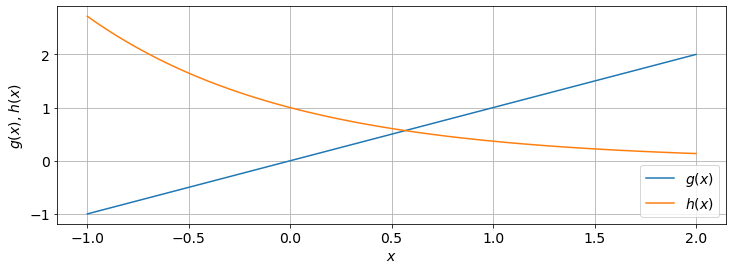

In [ ]:
x = np.linspace(-1, 2, 100)
g = x
h = np.exp(-x)

plt.plot(x, g, x, h)
plt.legend([r'$g(x)$', r'$h(x)$'])
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$, $h(x)$')


Vemos que la intersección aparece cerca de $ x = 0.6 $. Dado que tanto $ g $ como $ h $ son funciones monótonas, solo se cruzan una vez. En consecuencia, f debería tener una raíz única cerca de x = 0,6, como se muestra en el gráfico siguiente.

Text(0, 0.5, '$f(x)$')

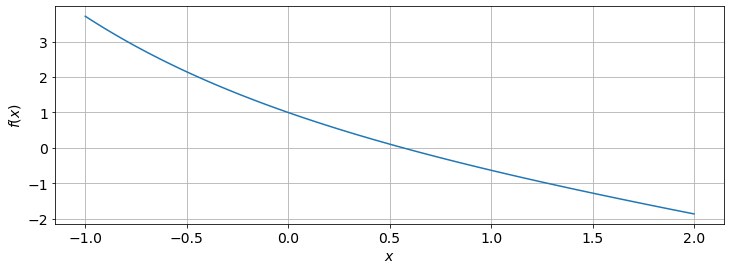

In [ ]:
f = np.exp(-x) - x

plt.plot(x, f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')



## Algoritmo de bisección



¿Cómo podemos encontrar esta raíz?

Bueno, sabemos que la raíz definitivamente se encuentra entre $ x = 0 $ y $ x = 1 $ ya que $ f (x) $ es monótonamente decreciente y
$$ f (0) = 1, $$
 por tanto $y$ positivo, y
$$ f (1) = \frac {1} {e} - 1 = −0,6321, $$
 por lo tanto $y$ negativo. La raíz debe estar en algún punto intermedio.

La estrategia ahora es "poner a cero" en la raíz comprobando los valores de la función cada vez más cerca de la raíz (desconocida).

Para hacerlo, dividamos el intervalo $ [0, 1] $ cuyos extremos acabamos de estudiar, en mitades eligiendo el punto medio $ x = 0.5 $. El valor de $ f $ en el punto medio es
$$ f (0.5) = 0.1065, $$
y por tanto positivo. Como $ f (1) <0 $, ahora sabemos que la raíz se encuentra entre $ x = 0.5 $ y $ x = 1 $. De manera similar al último paso, ahora elegimos el punto medio del intervalo $ [0.5, 1] $ para verificar el valor de la función:
$$ f (0,75) = −0,2776. $$
Por lo tanto, la raíz debe estar dentro del intervalo $ [0.5, 0.75] $.

Podemos seguir repitiendo estos pasos, lo que da como resultado intervalos cada vez más pequeños en los que debe estar la raíz. Puede suceder, aunque es poco probable, que uno de los puntos medios que finalmente elijamos coincida con la raíz. Sin embargo, este es un caso muy inusual.
Truncamos este método cuando estamos satisfechos con la precisión con la que hemos determinado la raíz. Simplemente viene dado por el ancho del último intervalo. Tenga en cuenta que no podemos exceder la precisión de la máquina de nuestra computadora, estableciendo un límite a nuestra división de intervalos.
El método anterior se llama __algoritmo de bisección__.

Ahora podemos escribir el algoritmo de bisección de forma sistemática.
Dada una función (continua) $ f (x) $, una raíz, si existe, se puede aproximar de la siguiente manera:
Encuentre dos valores $ x_p $ y $ x_m $ con $ f (x_p)> 0 $ y $ f (x_m) <0 $. Luego, sigue estos pasos:
1. Elija el punto medio $ x_ \mathrm {next} = \frac {x_p + x_m} {2}. $
2. Si $ f (x_ \mathrm {next}) $ tiene el mismo signo que $ f (x_p) $, entonces establecemos $ x_p = x_ \mathrm{next} $.
3. De lo contrario, establecemos $ x_m = x_\mathrm {next} $.
4. Repita los tres pasos anteriores hasta alcanzar la precisión deseada.

Es tan simple como eso. Determinemos la raíz de $ f(x) $ hasta una precisión determinada.

In [ ]:

tol=1e-7

x_i=0  # Punto Inicial
x_f=1  # Punto Final 
Diff= np.abs(x_i-x_f)
iteration=1
while Diff>tol:
  x_next= (x_i+x_f)/2
  f_next= np.exp(-x_next)-x_next
  f_p=    np.exp(-x_i)-x_i

  if (f_next*f_p)>0:
    x_i=x_next
  else:
    x_f=x_next
  Diff= np.abs(x_f-x_i)
  iteration=iteration+1

print ('La raíz para f(x)=0 es %f y esta usa %f iteraciones' %(x_i,iteration))

f_0= np.exp(-x_i)-x_i
print ('f(%f)=%f'%(x_i,f_0))

# import sympy as sp

# x=sp.symbols('x')
# f=sp.exp(-x)-x
# f_01=sp.solve(f,x)

# print(f_01[0])

# from scipy.special import lambertw
# f_2= lambertw(1)
# f_2




La raíz para f(x)=0 es 0.567143 y esta usa 25.000000 iteraciones
f(0.567143)=0.000000


## Algoritmo Newton-Raphson 



La idea es comenzar con una suposición $ x_1 $ y el punto correspondiente en el gráfico $ (x_1, f (x_1)) $. Elija $ x_1 = −0.5 $. Luego "seguimos" la línea tangente a la gráfica en ese punto hasta llegar al eje x.

La intersección de la recta tangente y el eje $ x $ nos da una nueva estimación, $ x_2 $, de la raíz. Como podemos ver, ahora estamos más cerca de la raíz real.

Podemos repetir este procedimiento, es decir, siguiendo una línea tangente en $ x_2 $ hasta que alcancemos el eje $ x $ de nuevo. Esto da como resultado nuestra próxima suposición $ x_3 $, y así sucesivamente.

En el gráfico anterior, podemos ver que la diferencia $ \Delta x $ (donde $ \Delta x = x_ \mathrm {next} - x_ \mathrm {cur}) $ entre la estimación actual, $ x_ \mathrm {cur} $, y la próxima suposición, $ x_ \mathrm {next} $, está relacionada con la pendiente de la recta tangente, $ f ′ (x_ \mathrm {cur}) $, vía (observe el signo menos)
$$ f ′ (x_ \mathrm {cur}) = - \frac {f (x_\mathrm {cur})} {\Delta x}. $$

Esto produce
$$ x_ \mathrm {next} = x_ \mathrm {cur} + \Delta x = x_ \mathrm {cur} - \frac {f (x_ \mathrm {cur})} {f '(x_ \mathrm {cur} )}. $$
Este procedimiento se puede formular como el siguiente __Algoritmo de Newton-Raphson__ (también llamado método de Newton):
1. Suponer un valor $ x_ \mathrm {cur} $ de la raíz de la función $ f (x) $. A veces, graficar ayuda a suponer un valor (ver arriba).
2. Si hay más de una raíz, intente elegir un valor cercano a la raíz que le interese.
3. Establezca $ x_ \mathrm {next} = x_ \mathrm {cur} - \frac {f (x_ \mathrm {cur})} {f '(x_ \mathrm {cur})} $ como la próxima estimación de raíz.
4. Establezca $ x_ \mathrm {cur} = x_ \mathrm {next} $.
5. Repita los pasos 3 y 4 hasta lograr la precisión deseada.



La raiz de f(x)=0 es 0.567143 con 6.000000 iteraciones


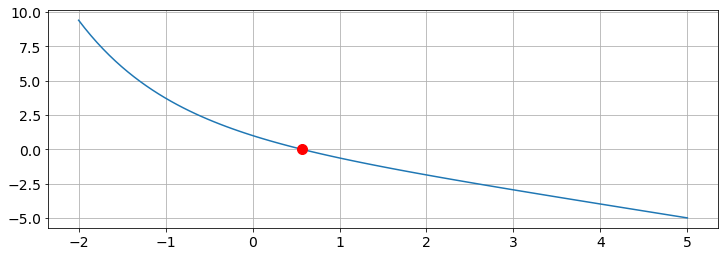

In [ ]:
x=np.linspace(-2,5,100)

y=np.exp(-x)-x
plt.plot(x,y)

def f(x): return np.exp(-x)-x
def df(x): return -np.exp(-x)-1

iteration=1

xi=-0.5
tol=1e-7
diff=np.abs(xi-x_next)

while tol<diff:
  x_next= xi-(f(xi)/df(xi))
  diff=np.abs(xi-x_next)
  xi=x_next
  iteration=iteration+1

plt.plot(xi,f(xi),'ro')
print('La raiz de f(x)=0 es %f con %f iteraciones' %(xi, iteration))


La precisión puede referirse a dos fenómenos:
1. Cuando el algoritmo converge, $ \Delta x $ finalmente disminuye con cada iteración. La pregunta es: ¿a qué valor de $ \Delta x $ deberíamos detener nuestro procedimiento iterativo?
2. ¿Qué tan cerca está $ f (x_ \mathrm {cur}) $ de cero?

Nota: En cada caso, no podemos estar seguros de qué tan cerca estamos realmente de la raíz real $ x_0 $. Esto tiene mucho que ver con el comportamiento de la función $ f $ cerca de $ x_0 $.
- En el caso 1, $ \Delta x $ en principio podría aumentar nuevamente durante la próxima iteración.
- En el caso 2, la magnitud de $ f (x_ \mathrm {cur}) $ podría en principio aumentar nuevamente en la siguiente iteración.

Si la raíz se encuentra en una región donde $ f (x) $ es casi lineal, el algoritmo convergerá rápidamente, mucho más rápido que el algoritmo de bisección.

Sin embargo, generalmente no hay garantía de que el algoritmo converja. Dos fenómenos ocurren con frecuencia cuando se aplica el algoritmo de Newton-Raphson. Discutámoslos uno por uno.

__Problema No. 1:__
La derivada $ f ′ (x_ \mathrm {cur}) $ a veces puede volverse muy pequeña, lo que hace que $ \Delta x = - \frac {f (x_ \mathrm {cur})} {f ′ (x_ \mathrm {cur} )} $ muy grande. Este es el caso cerca de los mínimos y máximos locales, o potencialmente en una inflexión (horizontal)
punto.

La próxima suposición $ x_ \mathrm {next} $ está entonces muy lejos de la raíz real. El código de computadora puede detenerse debido a números demasiado grandes por naturaleza, o uno ingresa a la región de otra raíz. En otras palabras, uno no regresa a ninguna parte cercana a la raíz del interés.
En este caso, es necesario cambiar la suposición inicial. O podemos limitar el tamaño del paso $ \Delta x $.

__Problema No. 2:__
El algoritmo no converge ni diverge. Más bien, permanece dentro de la vecindad de la raíz, oscilando en un bucle infinito alrededor de la raíz real sin acercarse a ella.

Nuevamente, es necesario cambiar la suposición inicial. O necesitamos reducir más el tamaño del paso (relajación): podemos reemplazar $ \Delta x $ por $ \gamma \Delta x $, con $ 0 <\gamma <1 $.
___

A veces, puede ser útil usar primero el método de bisección más lento pero confiable para acercarse lo suficiente a la raíz real para proporcionar una buena estimación inicial para el método más rápido de Newton-Raphson. Este último asume el control en algún momento, proporcionando una mejor convergencia.

Otro truco útil es aproximar la derivada $ f ′ (x_ \mathrm {cur}) $ por
$$ f ′ (x_ \mathrm {cur}) \approx \frac {f (x_ \mathrm {cur} + \delta x) −f (x_ \mathrm {cur})} {\delta x} $$
por un pequeño valor $ \delta x $. Esto resulta útil cuando la derivada no se puede calcular fácilmente en forma analítica y se requiere una estimación numérica.

__Ejemplo 2: __

Queremos resolver la ecuación
$$ 2 - x ^ 4 = \ tanh (x) $$
por $ x> 0 $. Por lo tanto, necesitamos resolver
$$ f (x) = 2 - x ^ 4 - \ tanh (x) $$
Nuestro algoritmo lee
$$
\begin {align}
x_ \mathrm {next} = x_ \mathrm {cur} - \frac {f (x_ \mathrm {cur})} {f '(x_ \mathrm {cur})} = \frac {2-x_ \mathrm {cur } ^ 4- \tanh (x_ \mathrm {cur})} {- 4 x_ \mathrm {cur} ^ 3- \frac {1} {\cosh (x_ \mathrm {cur}) ^ 2}}.
\end {align}
$$
Trazar $ f (x) $ nos ayuda a hacer una suposición inicial.

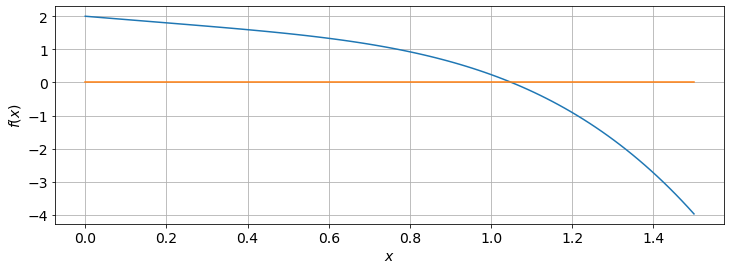

In [ ]:
x = np.linspace(0, 1.5, 100)
def f(x): return 2 - x**4 - np.tanh(x)

plt.plot(x, f(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

plt.plot(x,x*0)

Elegimos $ x_ \mathrm {cur} = x_1 = 1.0 $.

Ahora iteramos y encontramos las siguientes estimaciones sucesivas para la raíz de las primeras 5 iteraciones (hasta 12 dígitos significativos):

In [ ]:
N = 5

x_cur = 1.0
i=0
print(x_cur)

for i in range(N):
  i=i+1
  x_cur = x_cur-(2-x_cur**4-np.tanh(x_cur))/(-4*x_cur**3-1/(np.cosh(x_cur))**2)
  print(x_cur)
    
print('Valor de la última iteracion, f({}) ={}'.format(x_cur,f(x_cur)))


1.0
1.0539382868809093
1.0505495562464537
1.0505350542199834
1.05053505395561
1.05053505395561
Valor de la última iteracion, f(1.05053505395561) =-2.220446049250313e-16


¡Vemos que 5 iteraciones son suficientes en este caso!
El algoritmo de bisección requeriría muchas más iteraciones para la misma precisión.

El valor de $ f (x) $ para nuestra estimación raíz final es
$$ f (1.05053505396) = -2.22044604925 \times 10 ^ {- 16}. $$
¡Muy buen estimado!

__Nota:__
El método de Newton se puede extender a dimensiones más altas, es decir, tener $ k $ variables y $ k $ funciones de las cuales necesitamos encontrar las raíces simultáneamente. Esto es particularmente relevante para soluciones numéricas de ecuaciones diferenciales. Sin embargo, estas complejidades del método de Newton no se cubrirán en este módulo.

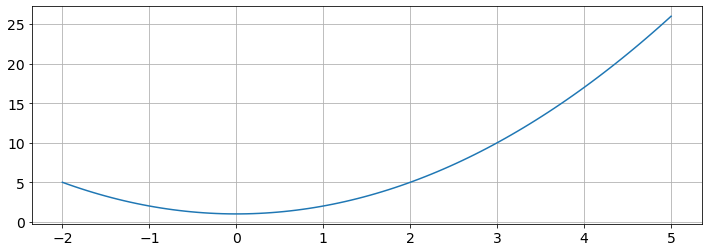

In [ ]:
#r-x-exp(x)
#1+rx+x2
x=np.linspace(-2,5,100)

#y=r-x-np.exp(x)
r=0
y= 1+r*x+x**2
plt.plot(x,y)

# def f(x): return np.exp(-x)-x
def f(x): return 1+r*x+x**2
def df(x): return r+2*x
# def df(x): return -np.exp(-x)-1

# iteration=1

# xi=1.3
# tol=1e-7
# diff=np.abs(xi-x_next)

# while tol<diff:
#   x_next= xi-(f(xi)/df(xi))
#   diff=np.abs(xi-x_next)
#   xi=x_next
#   iteration=iteration+1

# plt.plot(xi,f(xi),'ro')
# print('La raiz de f(x)=0 es %f con %f iteraciones' %(xi, iteration))

In [ ]:
from sympy import symbols, solve

x = symbols('x')

r=-4

expr = 1+r*x+x**2


sol = solve(expr)
print(sol)

[-sqrt(3) + 2, sqrt(3) + 2]
